<a href="https://colab.research.google.com/github/hmyrcmn/KUL/blob/main/BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorboard

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

!git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder ='/content/KUL/BigData/TrueValues'
X_data = []
x2_data=[]
Y_labels = []

for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim
    x2_data.append(data[:, 0:])
    Y_labels.append(1)








false_folder = '/content/KUL/BigData/FalseValues'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim
    x2_data.append(data[:, 0:])
    Y_labels.append(0)




X_data = np.array(X_data)
Y_labels = np.array(Y_labels)
x2_data=np.array(x2_data)
print("x_data shape: ",X_data.shape)
# X_data=X_data,x2_data
X_data



Cloning into 'KUL'...
remote: Enumerating objects: 74556, done.
remote: Counting objects: 100% (3988/3988), done.
remote: Compressing objects: 100% (456/456), done.
remote: Total 74556 (delta 3547), reused 3960 (delta 3532), pack-reused 70568
Receiving objects: 100% (74556/74556), 36.86 MiB | 9.06 MiB/s, done.
Resolving deltas: 100% (73857/73857), done.
Updating files: 100% (16096/16096), done.
x_data shape:  (2000, 1000, 1)


array([[[201.32509767],
        [201.29264308],
        [201.2567427 ],
        ...,
        [201.05048642],
        [200.92746245],
        [200.79717031]],

       [[201.32509767],
        [201.29264308],
        [201.2567427 ],
        ...,
        [201.05048642],
        [200.92746245],
        [200.79717031]],

       [[201.32509767],
        [201.29264308],
        [201.2567427 ],
        ...,
        [201.05048642],
        [200.92746245],
        [200.79717031]],

       ...,

       [[199.74131559],
        [200.11487128],
        [200.45939665],
        ...,
        [211.67205227],
        [211.52049   ],
        [211.35571745]],

       [[199.74131559],
        [200.11487128],
        [200.45939665],
        ...,
        [211.67205227],
        [211.52049   ],
        [211.35571745]],

       [[199.74131559],
        [200.11487128],
        [200.45939665],
        ...,
        [211.67205227],
        [211.52049   ],
        [211.35571745]]])

In [3]:
# Verileri düzenleme ve normalleştirme
num_samples = len(X_data)
sequence_length = X_data.shape[1]
num_features = X_data.shape[2]

X_data_normalized = X_data.reshape(num_samples, sequence_length * num_features)

# Eğitim ve test setlerine bölme


X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, Y_labels, test_size=0.2, random_state=42)

print("X_train.shape:",X_train.shape)
X_train

X_train.shape: (1600, 1000)


array([[201.32509767, 201.29264308, 201.2567427 , ..., 201.05048642,
        200.92746245, 200.79717031],
       [201.32509767, 201.29264308, 201.2567427 , ..., 201.05048642,
        200.92746245, 200.79717031],
       [201.32509767, 201.29264308, 201.2567427 , ..., 201.05048642,
        200.92746245, 200.79717031],
       ...,
       [201.32509767, 201.29264308, 201.2567427 , ..., 201.05048642,
        200.92746245, 200.79717031],
       [199.74131559, 200.11487128, 200.45939665, ..., 211.67205227,
        211.52049   , 211.35571745],
       [207.74131559, 200.11487128, 200.45939665, ..., 211.67205227,
        211.52049   , 211.35571745]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import TensorBoard
import tensorflow as tf
import numpy as np
from datetime import datetime


# TensorBoard için bir log dizini oluşturun
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"TensorBoard Link: https://tensorboard.dev/experiment/{log_dir}")

# TensorBoard Callback'ini oluşturun
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Model oluşturma
model = Sequential()
model.add(Flatten(input_shape=(1000, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

# Model derleme
model.compile(optimizer='Nadam', loss='mean_squared_error', metrics=['mse','accuracy'])

# Model özetini yazdırma
model.summary()

# Modeli eğitme ve TensorBoard geri çağırımını kullanma
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[tensorboard_callback])

# Diğer değerlendirmeleri yapma ve sonuçları yazdırma
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test MSE: {test_mse}, Test Accuracy: {test_acc}')

# Model özetini yazdırma
model.summary()

# Test seti üzerinde tahminler yapma
y_pred_probabilities = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Tahmin edilen sınıfları ve olasılıkları yazdırma
for i in range(5):
    print(f"Actual Class: {y_test[i]}, Predicted Class: {y_pred_classes[i]}, Probabilities: {y_pred_probabilities[i]}")



log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(X_train, y_train, epochs=60, batch_size=128, validation_split=0.2, callbacks=[tensorboard_callback])
%load_ext tensorboard
%tensorboard --logdir logs/fit





13/13 [==============================] - 0s 4ms/step


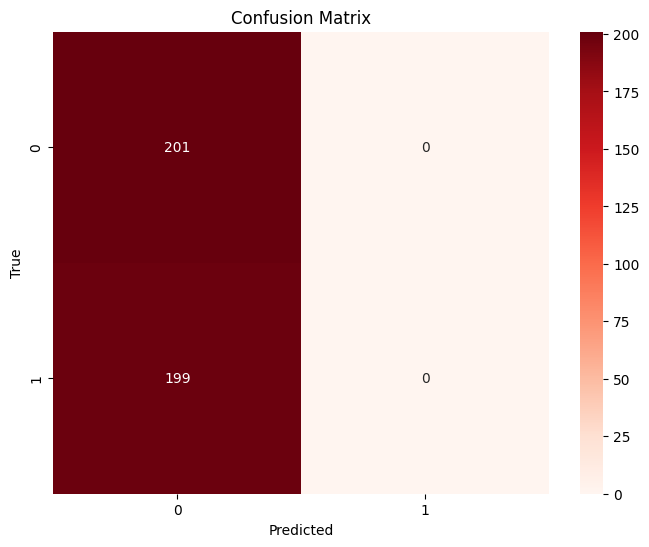

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Modelin tahminlerini alın
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)  # Eşik değeri üzerinden sınıflara dönüştürme

# Confusion matrix oluşturun
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrix'i seaborn ile görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





In [8]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

# !git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder = '/content/KUL/BigData/TrueValues'
X_data1 = []
X_data2 = []

Y_labels = []
Y_labels2 = []


for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data1.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(1)

false_folder = '/content/KUL/BigData/FalseValues'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data2.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels2.append(0)

X_data1 = np.array(X_data1)
X_data2 = np.array(X_data2)

Y_labels = np.array(Y_labels)
Y_labels2 = np.array(Y_labels2)
